# Dataframes ( Pandas ) and Plotting ( Matplotlib/Seaborn )

*Written by Jin Cheong & Luke Chang*

In this lab we are going to learn how to load and manipulate datasets in a dataframe format using Pandas   
and create beautiful plots using Matplotlib and Seaborn. Pandas is akin to a data frame in R and provides an intuitive way to interact with data in a 2D data frame. Matplotlib is a standard plotting library that is similar in functionality to Matlab's object oriented plotting. Seaborn is also a plotting library built on the Matplotlib framework which carries useful pre-configured plotting schemes. 

After the tutorial you will have the chance to apply the methods to a new set of data. 

First we load the basic packages we will be using in this tutorial

In [344]:
%matplotlib inline 
# matplotlib inline enables plotting IN the notebook and not opening another window.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Pandas

## Loading Data
We use the pd.read_csv() to load a .csv file into a dataframe. 
Note that read_csv() has many options that can be used to make sure you load the data correctly. 

In [388]:
# Import data
df = pd.read_csv('../Data/salary.csv',sep = ',', header='infer')

In [346]:
# recap on how to look for Docstrings.
pd.read_csv?

## Ways to check the dataframe 
There are many ways to examine your dataframe. 
One easy way is to execute the dataframe itself. 

In [ ]:
# Execute the dataframe object to see the entire dataframe. 
df

However, often the dataframes can be large and we may be only interested in seeing the first few rows.  `df.head()` is useful for this purpose.  `shape` is another useful method for getting the dimensions of the matrix.  We will print the number of rows and columns in this data set by using output formatting.  Use the `%` sign to indicate the type of data (e.g., `%i`=integer, `%d`=float, `%s`=string), then use the `%` followed by a tuple of the values you would like to insert into the text.  See [here](https://pyformat.info/) for more info about formatting text.

In [350]:
print 'There are %i rows and %i columns in this data set' % df.shape
print df.shape

There are 76 rows and 8 columns in this data set
(76, 8)


In [347]:
df.head()

,salary,gender,departm,years,age,publications,salary_in_departm,dept_num
0,86285,0,bio,26.0,64.0,72,23190.3125,0
1,77125,0,bio,28.0,58.0,43,14030.3125,0
2,71922,0,bio,10.0,38.0,23,8827.3125,0
3,70499,0,bio,16.0,46.0,64,7404.3125,0
4,66624,0,bio,11.0,41.0,23,3529.3125,0


On the top row, you have column names, that can be called like a dictionary (a dataframe can be essentially thought of as a dictionary with column names as the keys).
The left most column (0,1,2,3,4...) is called the index of the dataframe. 

In [353]:
print "Indexes"
print df.index
print "Columns"
print df.columns
print "Columns are like keys of a dictionary"
print df.keys()

Indexes
Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 68,
            69, 70, 71, 72, 73, 74, 75, 76],
           dtype='int64')
Columns
Index([u'salary', u'gender', u'departm', u'years', u'age', u'publications',
       u'salary_in_departm', u'dept_num'],
      dtype='object')
Columns are like keys of a dictionary
Index([u'salary', u'gender', u'departm', u'years', u'age', u'publications',
       u'salary_in_departm', u'dept_num'],
      dtype='object')


You can access the values of a column by calling it directly. 

In [ ]:
# Double bracket returns a dataframe
df[['salary']]

In [ ]:
# Single bracket returns a Series
df['salary']

In [ ]:
# You can also call a column like an attribute if the column name is a string 
df.salary

You can create new columns to fit your needs. 
For instance you can set initialize a new column with zeros. 

In [389]:
# Create a new column with zeros
df['pubperyear'] = 0

In [390]:
# Create a new column
df['pubperyear'] = df['publications']/df['years']

In [391]:
df.head()

,salary,gender,departm,years,age,publications,pubperyear
0,86285,0,bio,26.0,64.0,72,2.769231
1,77125,0,bio,28.0,58.0,43,1.535714
2,71922,0,bio,10.0,38.0,23,2.300000
3,70499,0,bio,16.0,46.0,64,4.000000
4,66624,0,bio,11.0,41.0,23,2.090909


## Indexing and slicing
Indexing in Pandas can be tricky. There are four ways to index: loc, iloc, ix, and explicit indexing(useful for booleans). 

In [369]:
# Using .loc references the explicit index. 
df.loc[0,['salary']]

salary    86285
Name: 0, dtype: object

In [370]:
# Using .iloc references the implicit python index (starting from 0, exclusive of last number)
df.iloc[0:3,0:3]

,salary,gender,departm
0,86285,0,bio
1,77125,0,bio
2,71922,0,bio


In [371]:
# Using .ix refernces a combination of explicit and implicit indexing.  
df.ix[0:3,0:3]

,salary,gender,departm
0,86285,0,bio
1,77125,0,bio
2,71922,0,bio
3,70499,0,bio


In [409]:
# Let's say I want to make a new dataset with just Males and another with just Females. 
maledf = df[df.gender==0].reset_index(drop=True)
femaledf = df[df.gender==1].reset_index(drop=True)

In [392]:
# Boolean indexing is useful if you need to sort the data based on some True or False value
# For instance, who are the people with salaries greater than 90K but lower than 100K ? 
df[ (df.salary > 90000) & (df.salary < 100000)]

,salary,gender,departm,years,age,publications,pubperyear
14,97630,0,chem,34.0,64.0,43,1.264706
30,92951,0,neuro,11.0,41.0,20,1.818182
54,96936,0,physics,15.0,50.0,17,1.133333


## Dealing with missing values
It is easy to quickly count the number of missing values for each column in the dataset using the `isnull()` method.  One thing that is  nice about Python is that you can chain commands, which means that the output of one method can be the input into the next method.  This allows us to write intuitive and concise code.  Notice how we take the `sum()` of all of the null cases.

In [ ]:
# This method returns a dataframe with True/False values on whether a datapoint is null
df.isnull()

In [378]:
# We can chain the .sum() method to see how many null values are added up. 
df.isnull().sum()

salary               0
gender               0
departm              0
years                1
age                  1
publications         0
salary_in_departm    0
dept_num             0
pubperyear           1
dtype: int64

In [393]:
# You can use the boolean indexing once again to see the datapoints that have missing values.
# We chained the method .any() whic check if there are any True values for a given axis.
df[df.isnull().any(axis=1)]

,salary,gender,departm,years,age,publications,pubperyear
18,64762,0,chem,25.0,NaN,29,1.16
24,104828,0,geol,NaN,50.0,44,NaN


In [394]:
# you may look at where the values are not null
# Note that indexes 18, and 24 are missing. 
df[~df.isnull().any(axis=1)]

,salary,gender,departm,years,age,publications,pubperyear
0,86285,0,bio,26.0,64.0,72,2.769231
1,77125,0,bio,28.0,58.0,43,1.535714
2,71922,0,bio,10.0,38.0,23,2.300000
3,70499,0,bio,16.0,46.0,64,4.000000
4,66624,0,bio,11.0,41.0,23,2.090909
5,64451,0,bio,23.0,60.0,44,1.913043
6,64366,0,bio,23.0,53.0,22,0.956522
7,59344,0,bio,5.0,40.0,11,2.200000
8,58560,0,bio,8.0,38.0,8,1.000000
9,58294,0,bio,20.0,50.0,12,0.600000


There are different techniques for dealing with missing data.  An easy one is to simply remove rows that have any missing values using the `dropna()` method.

In [385]:
df = df.dropna()

Now we can check to make sure the missing rows are removed.  Let's also check the new dimensions of the dataframe.

In [386]:
print 'There are %i rows and %i columns in this data set' % df.shape
df.isnull().sum()

There are 74 rows and 9 columns in this data set


salary               0
gender               0
departm              0
years                0
age                  0
publications         0
salary_in_departm    0
dept_num             0
pubperyear           0
dtype: int64

## Describing the data
We can use the `.describe()` method to get a quick summary of the continuous values of the data frame. We will `.transpose()` the output to make it slightly easier to read. 

In [395]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
salary,77.0,67748.519481,15100.581435,44687.000000,57185.000000,62607.000000,75382.000000,112800.0
gender,77.0,0.142857,0.387783,0.000000,0.000000,0.000000,0.000000,2.0
years,76.0,14.973684,8.617770,1.000000,8.000000,14.000000,23.000000,34.0
age,76.0,45.486842,9.005914,31.000000,38.000000,44.000000,53.000000,65.0
publications,77.0,21.831169,15.240530,3.000000,9.000000,19.000000,33.000000,72.0
pubperyear,76.0,1.916508,1.594672,0.173913,0.776515,1.626923,2.460165,8.0


We can also get quick summary of a pandas series, or specific column of a pandas dataframe.

In [398]:
df.departm.describe()

count      77
unique      7
top       bio
freq       16
Name: departm, dtype: object

## Manipulating data in Groups
One manipulation we often do is look at variables in groups. 
One way to do this is to usethe `.groupby(key)` method. 
The key is a column that is used to group the variables together. 
For instance, if we want to group the data by gender and get group means, we perform the following.

In [399]:
# Group the data by gender and get per gender mean. 
df.groupby('gender').mean()

,salary,years,age,publications,pubperyear
gender,,,,,
0,69576.746269,15.984848,46.545455,23.462687,1.913123
1,55719.666667,8.666667,38.888889,11.555556,2.043170
2,53517.000000,5.000000,35.000000,5.000000,1.000000


Other default aggregation methods include .count(), .mean(), .median(), .min(), .max(), .std(), .var(), and .sum()

Before we move on, it looks like there were more than 2 genders specified in our data. 
This is likely an error in the data collection process so let recap on how we might remove this datapoint. 

In [400]:
# Find where gender is miswritten
df[df['gender']==2]

,salary,gender,departm,years,age,publications,pubperyear
67,53517,2,math,5.0,35.0,5,1.0


In [401]:
# replace original dataframe without the miscoded data
df = df[df['gender']!=2]

In [402]:
# Now we have a corrected dataframe!
df.groupby('gender').mean()

,salary,years,age,publications,pubperyear
gender,,,,,
0,69576.746269,15.984848,46.545455,23.462687,1.913123
1,55719.666667,8.666667,38.888889,11.555556,2.043170


Another powerful tool in Pandas is the split-apply-combine method. 
For instance, let's say we also want to look at how much each professor is earning in respect to the department. 
Let's say we want to subtract the departmental mean from professor and divide it by the departmental standard deviation. 
We can do this by using the `groupby(key)` method chained with the `.transform(function)` method. 
It will group the dataframe by the key column, perform the "function" transformation of the data and return data in same format.
To learn more, see link [here](http://nbviewer.jupyter.org/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/03.08-Aggregation-and-Grouping.ipynb)

In [403]:
# key: We use the departm as the grouping factor. 
key = df.departm
# function: We want to standardize salary for each department.
zscore = lambda x: (x - x.mean()) / x.std()
transformed = df.groupby(key).transform(zscore)
df['salary_in_departm'] = transformed['salary']

In [405]:
# Now we have 'salary_in_departm' column showing standardized salary per department.
df.head()

,salary,gender,departm,years,age,publications,pubperyear,salary_in_departm
0,86285,0,bio,26.0,64.0,72,2.769231,2.468065
1,77125,0,bio,28.0,58.0,43,1.535714,1.493198
2,71922,0,bio,10.0,38.0,23,2.300000,0.939461
3,70499,0,bio,16.0,46.0,64,4.000000,0.788016
4,66624,0,bio,11.0,41.0,23,2.090909,0.375613


## Combining datasets : pd.concat
Recall that we sliced the dataframes into male and female dataframe in 2.3 Indexing and Slicing. 
Now we will learn how to put dataframes together which is done by the pd.concat method. 

In [ ]:
# note how the index of this output retains the old index. 
pd.concat([femaledf,maledf],axis = 0)

In [ ]:
# to reset index
pd.concat([maledf,femaledf],axis = 0).reset_index(drop=True)

## Plotting in pandas
Before we move into Matplotlib, here are a few plotting methods already implemented in Pandas. 
### Boxplot

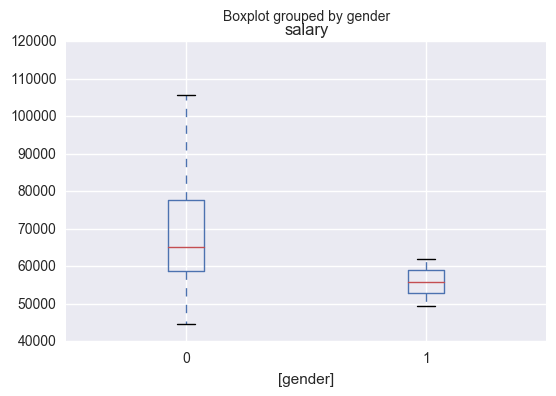

In [414]:
df[['salary','gender']].boxplot(by='gender')

### Scatterplot

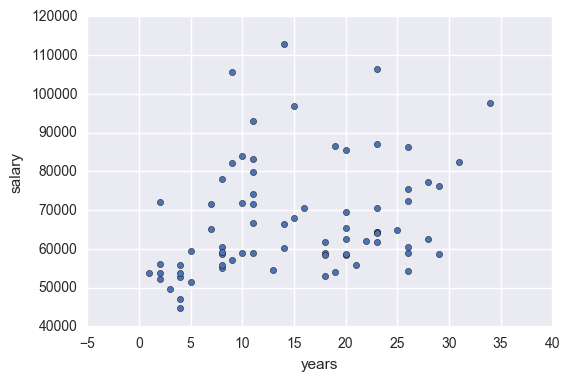

In [155]:
df[['salary','years']].plot(kind='scatter', x='years', y='salary')

### Plotting Categorical Variables. Replacing variables with .map
If we want to plot department on the x-axis, Pandas plotting functions won't know what to do
because they don't know where to put bio or chem on a numerical x-axis. 
Therefore one needs to change them to numerical variable to plot them with basic functionalities (we will later see how Seaborn sovles this). 

In [420]:
# create a new numericalSeries called dept_num for visualization.
df['dept_num'] = 0
df.loc[:,['dept_num']] = df.departm.map({'bio':0, 'chem':1,'geol':2,'neuro':3,'stat':4,'physics':5,'math':6})
df.tail()

,salary,gender,departm,years,age,publications,pubperyear,salary_in_departm,dept_num
72,53662,1,neuro,1.0,31.0,3,3.000000,-1.270712,3
73,57185,1,stat,9.0,39.0,7,0.777778,-0.677103,4
74,52254,1,stat,2.0,32.0,9,4.500000,-1.009063,4
75,61885,1,math,23.0,60.0,9,0.391304,-0.008401,6
76,49542,1,math,3.0,33.0,5,1.666667,-1.116592,6


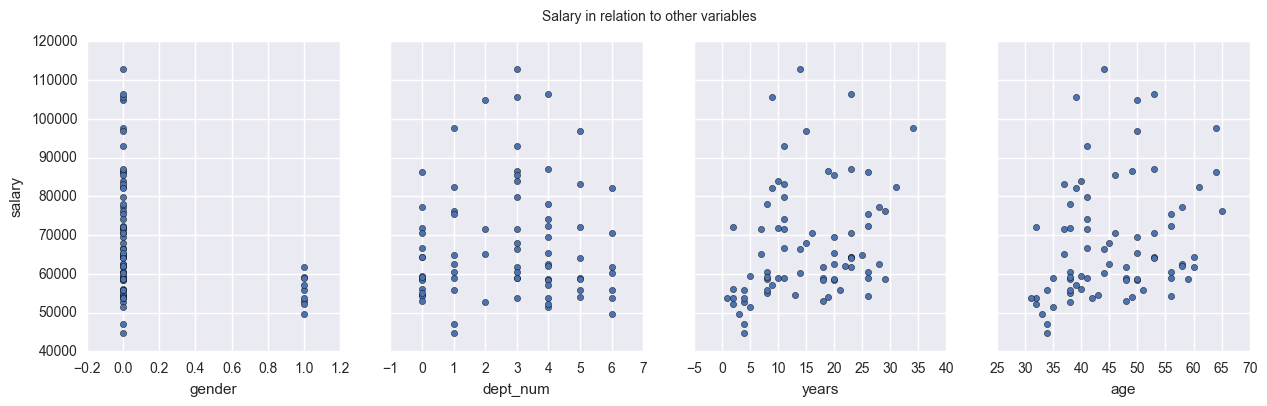

In [421]:
## Now plot all four categories
f, axs = plt.subplots(1, 4, sharey=True)
f.suptitle('Salary in relation to other variables')
df.plot(kind='scatter', x='gender', y='salary', ax=axs[0], figsize=(15, 4))
df.plot(kind='scatter', x='dept_num', y='salary', ax=axs[1])
df.plot(kind='scatter', x='years', y='salary', ax=axs[2])
df.plot(kind='scatter', x='age', y='salary', ax=axs[3])
# The problem is that it treats department as a continuous variable. 

### Generating bar - errorbar plots in Pandas

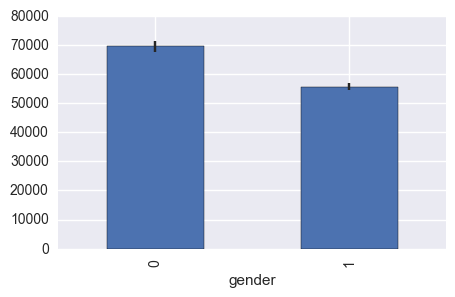

In [422]:
means = df.groupby('gender').mean()['salary']
errors = df.groupby('gender').std()['salary'] / np.sqrt(df.groupby('gender').count()['salary'])
ax = means.plot.bar(yerr=errors,figsize=(5,3))

# Matplotlib
Learn other matplotlib tutorials [here](http://nbviewer.jupyter.org/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.00-Introduction-To-Matplotlib.ipynb)

## create a basic lineplot

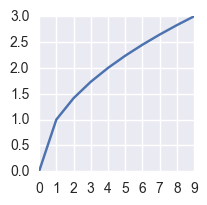

In [435]:
plt.figure(figsize=(2,2))
plt.plot(range(0,10),np.sqrt(range(0,10)))
plt.show()

## create a basic scatterplot

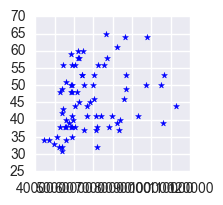

In [434]:
plt.figure(figsize=(2,2))
plt.scatter(df.salary,df.age,color='b',marker='*')
plt.show()

## Modify different aspects of the plot

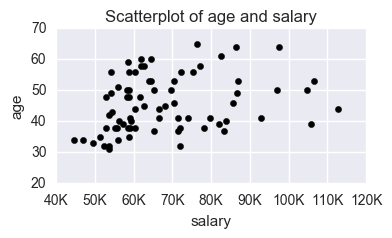

In [424]:
# plt.subplots allows you to control different aspects of multiple plots
f,ax = plt.subplots(1,1,figsize=(4,2)) 
ax.scatter(df.salary,df.age,color='k',marker='o')
# Setting limits on axes
ax.set_xlim([40000,120000])
ax.set_ylim([20,70])
# Changing tick labels
ax.set_xticklabels([str(int(tick)/1000)+'K' for tick in ax.get_xticks()])
# changing label names
ax.set_xlabel('salary')
ax.set_ylabel('age')
# changing the title
ax.set_title('Scatterplot of age and salary')
plt.show()

In [ ]:
# save figure
f.savefig('MyFirstPlot.png')

## Create multiple plots

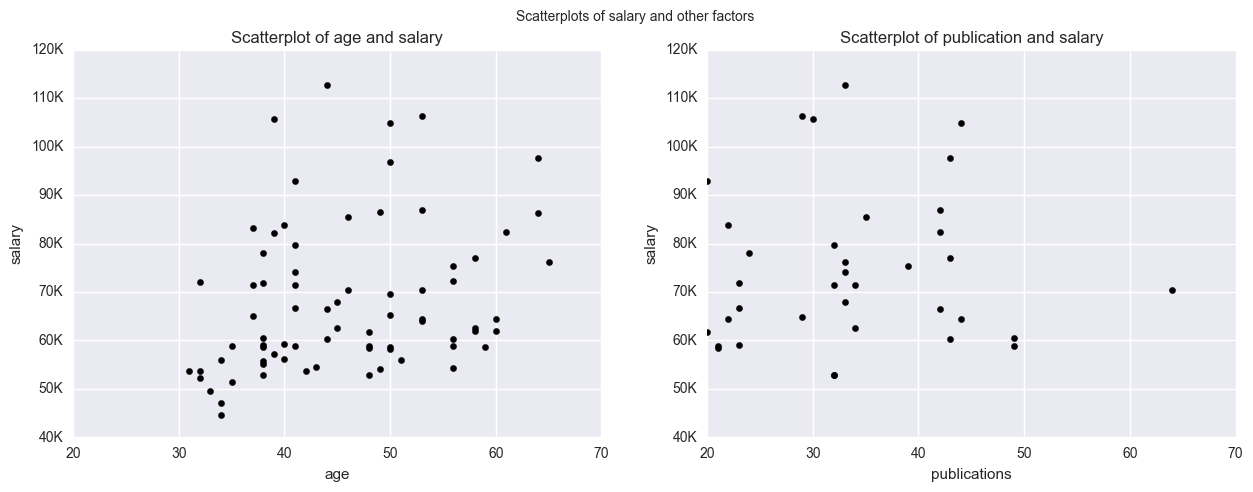

In [446]:
f,axs = plt.subplots(1,2,figsize=(15,5)) # create a plot figure, specify the size and number of figures.
axs[0].scatter(df.age,df.salary,color='k',marker='o')
axs[0].set_ylim([40000,120000])
axs[0].set_xlim([20,70])
axs[0].set_yticklabels([str(int(tick)/1000)+'K' for tick in axs[0].get_yticks()])
axs[0].set_ylabel('salary')
axs[0].set_xlabel('age')
axs[0].set_title('Scatterplot of age and salary')

axs[1].scatter(df.publications,df.salary,color='k',marker='o')
axs[1].set_ylim([40000,120000])
axs[1].set_xlim([20,70])
axs[1].set_yticklabels([str(int(tick)/1000)+'K' for tick in axs[1].get_yticks()])

axs[1].set_ylabel('salary')
axs[1].set_xlabel('publications')
axs[1].set_title('Scatterplot of publication and salary')

f.suptitle('Scatterplots of salary and other factors')

plt.show()

# Seaborn
Other great tutorials about seaborn are [here](http://nbviewer.jupyter.org/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.14-Visualization-With-Seaborn.ipynb)

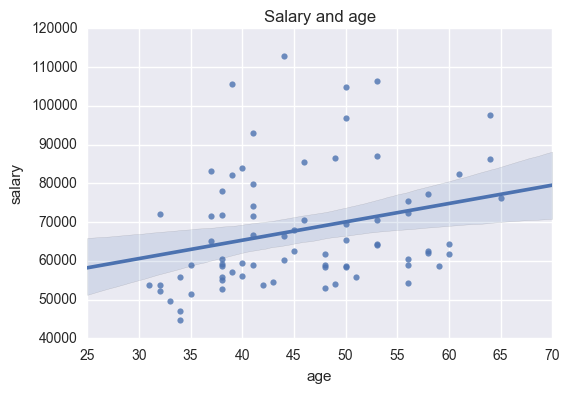

In [459]:
ax = sns.regplot(df.age,df.salary)
ax.set_title('Salary and age')
plt.show()

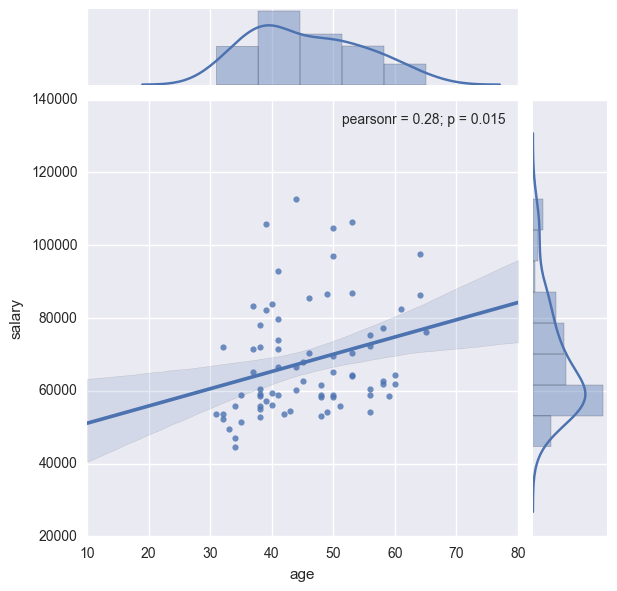

In [460]:
sns.jointplot("age", "salary", data=df, kind='reg');

## Factor plots allow you to visualize the distribution of parameters in different forms such as point, bar, or violin graphs.

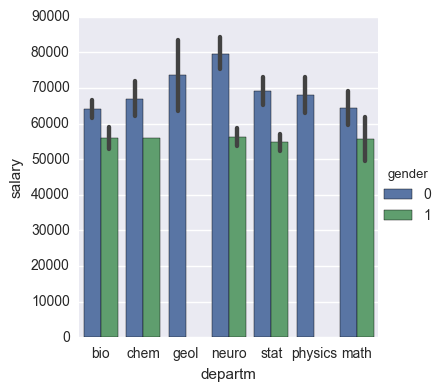

In [453]:
# kind : {point, bar, count, box, violin, strip}
sns.factorplot(x='departm',y='salary',hue='gender',data=df,ci=68,kind='bar')
plt.show()

## Heatmap plots allow you to visualize relationships across variables

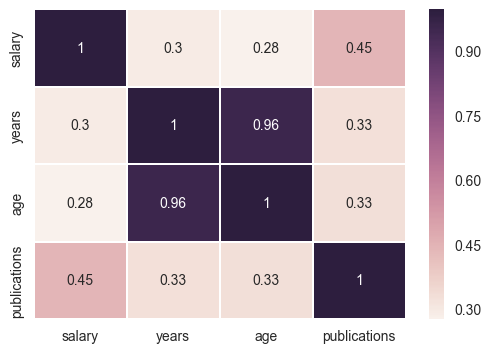

In [463]:
sns.heatmap(df[['salary','years','age','publications']].corr(),annot=True,linewidths=.5)

# Exercises ( Homework)
The following exercises uses the dataset "salary_exercise.csv" adapted from material available [here](http://data.princeton.edu/wws509/datasets/#salary)

These are the salary data used in Weisberg's book, consisting of observations on six variables for 52 tenure-track professors in a small college. The variables are:

- sx = Sex, coded 1 for female and 0 for male
- rk = Rank, coded
 - 1 for assistant professor,
 - 2 for associate professor, and
 - 3 for full professor
- yr = Number of years in current rank
- dg = Highest degree, coded 1 if doctorate, 0 if masters
- yd = Number of years since highest degree was earned
- sl = Academic year salary, in dollars.

Reference: S. Weisberg (1985). Applied Linear Regression, Second Edition. New York: John Wiley and Sons. Page 194.

## Exercise 1

Read the salary_exercise.csv into a dataframe, and change the column names to a more readable format such as 
sex, rank, yearsinrank, degree, yearssinceHD, and salary. Exclude data points that has any missing value. What are the overall mean, standard deviation, min, and maximum of professors' salary? 

## Exercise 2
Using the same data, what are the means and standard deviations of salary for different professor ranks? 
Create a new column on the original dataframe in which you calculate the standardized salary for each rank group. 

## Exercise 3
Recreate the plot shown in figure. 
On the left is a correlation of all parameters of only the male professors.
On the right is the same but only for female professors. 
The colormap code used is 'RdBu_r'. Read the Docstrings on sns.heatmap or search the internet to figure out how to change the colormap, scale the colorbar, and create square line boundaries. 
Place titles for each plot as shown, and your name as the main title. 

![title](Figures/hw2-3.png)

## Exercise 4
Recreate the following plot from the salary_exercise.csv dataset. 
Create a 1 x 2 subplot. 
On the left is a bar-errorbar of salary per gender. 
On the right is a scatterplot of salary on y-axis and years in rank on the x-axis.
Set the axis limits as shown in the picture and modify their lables. 
Add axis label names. 
Add your name as the main title of the plot. 

![title](Figures/hw2-4.png)